In [13]:
#dependencies
%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import requests
import time
import pprint
import csv
import seaborn as sns

In [3]:
#import and read csv
rain = "data/precipitation_new.csv"

rain_df = pd.read_csv(rain)
rain_df

,state,Unnamed: 1,year,month,precipitation
0,AC,1/31/1998,1998,Jan,335.5
1,AC,2/28/1998,1998,Feb,299.4
2,AC,3/31/1998,1998,Mar,396.7
3,AC,4/30/1998,1998,Apr,102.7
4,AC,5/31/1998,1998,May,19.0
...,...,...,...,...,...
5809,TO,7/31/2017,2017,Jul,0.0
5810,TO,8/31/2017,2017,Aug,0.0
5811,TO,9/30/2017,2017,Sep,0.0
5812,TO,10/31/2017,2017,Oct,21.6


In [4]:
#group by annual sum across Brazil
yeargroup_df = rain_df.groupby(["year"])
year_sum = yeargroup_df.sum()["precipitation"]
year_sum_df = pd.DataFrame(year_sum)

year_sum_response = year_sum_df.reset_index()
year_sum_response

,year,precipitation
0,1998,39164.8
1,1999,41545.0
2,2000,46756.6
3,2001,34510.5
4,2002,42450.8
5,2003,41609.6
6,2004,47358.5
7,2005,45354.4
8,2006,45854.7
9,2007,40209.7


In [5]:
#set axis info
precipitation = [39164.8, 41545.0, 46756.6, 34510.5, 42450.8, 41609.6, 47358.5, 45354.4, 45854.7, 40209.7, 46766.2, 50960.7, 43636.6, 51699.8, 40002.9, 46226.1, 42386.3, 39944.7, 38136.4, 38885.2]
x_axis = np.arange(len(precipitation))

<IPython.core.display.Javascript object>


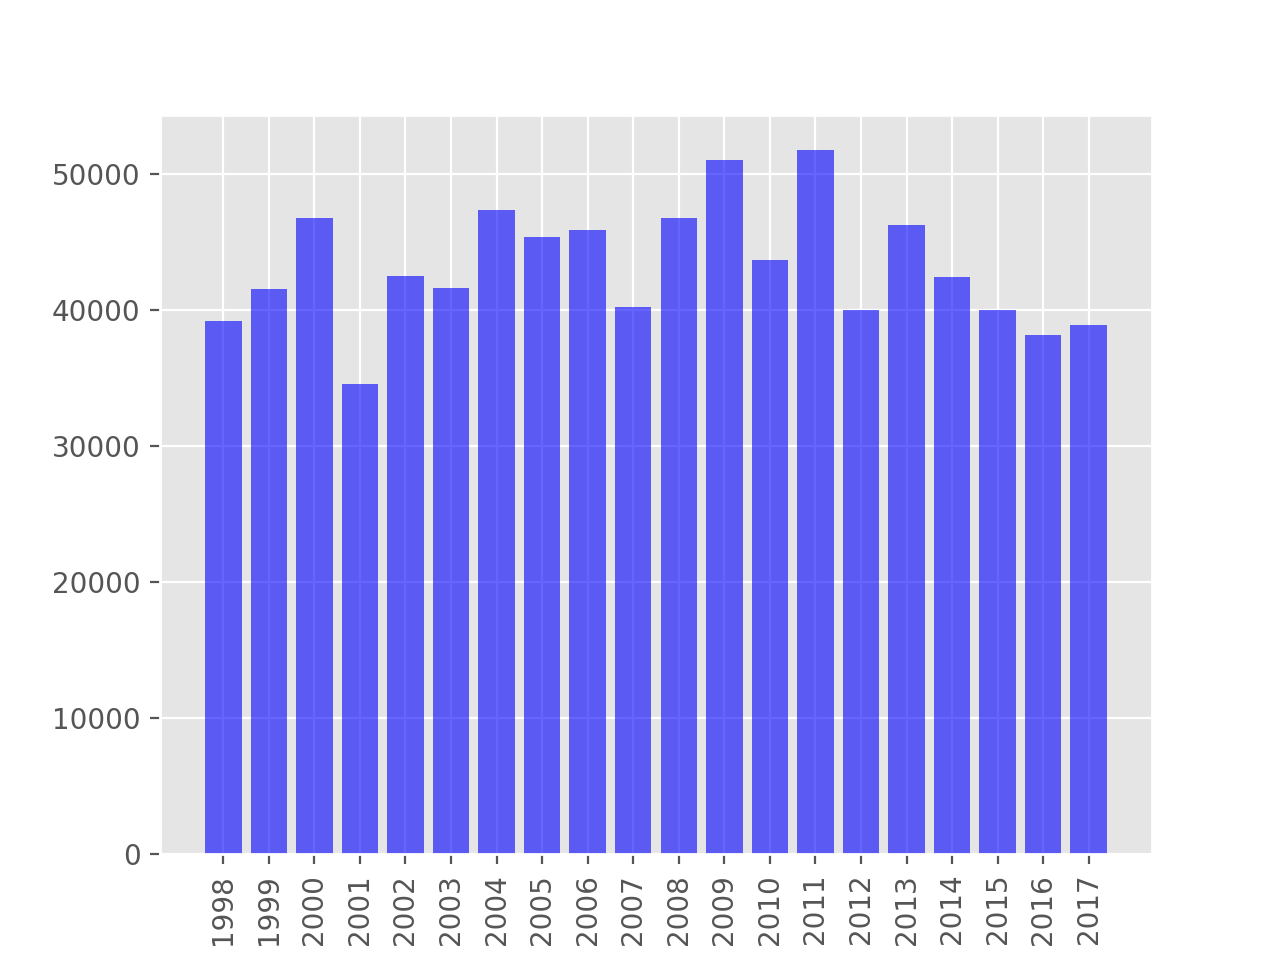

<BarContainer object of 20 artists>

In [6]:
#plot annual precipitation
plt.bar(x_axis, precipitation, color='b', alpha=0.6, align="center")

In [7]:
#clean up tick locations
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'], rotation=90)

([<matplotlib.axis.XTick at 0x1a1fab4a10>,
 <a list of 20 Text xticklabel objects>)

In [7]:
#set titles and measurements
plt.title("Annual Precipitation in Brazil")
plt.xlabel("Year")
plt.ylabel("Precipitation(mm)")

plt.savefig("Annual Precipitation in Brazil.png")

In [8]:
#reset data to include state
state = rain_df.groupby(["state", "year"])
state_groupby = state.sum()["precipitation"]

state_df = pd.DataFrame(state_groupby)

state_response = state_df.reset_index()
state_response

,state,year,precipitation
0,AC,1998,2296.1
1,AC,1999,2182.2
2,AC,2000,1703.5
3,AC,2001,1926.9
4,AC,2002,1909.9
...,...,...,...
490,TO,2013,1849.3
491,TO,2014,1843.9
492,TO,2015,1393.7
493,TO,2016,1270.5


<IPython.core.display.Javascript object>


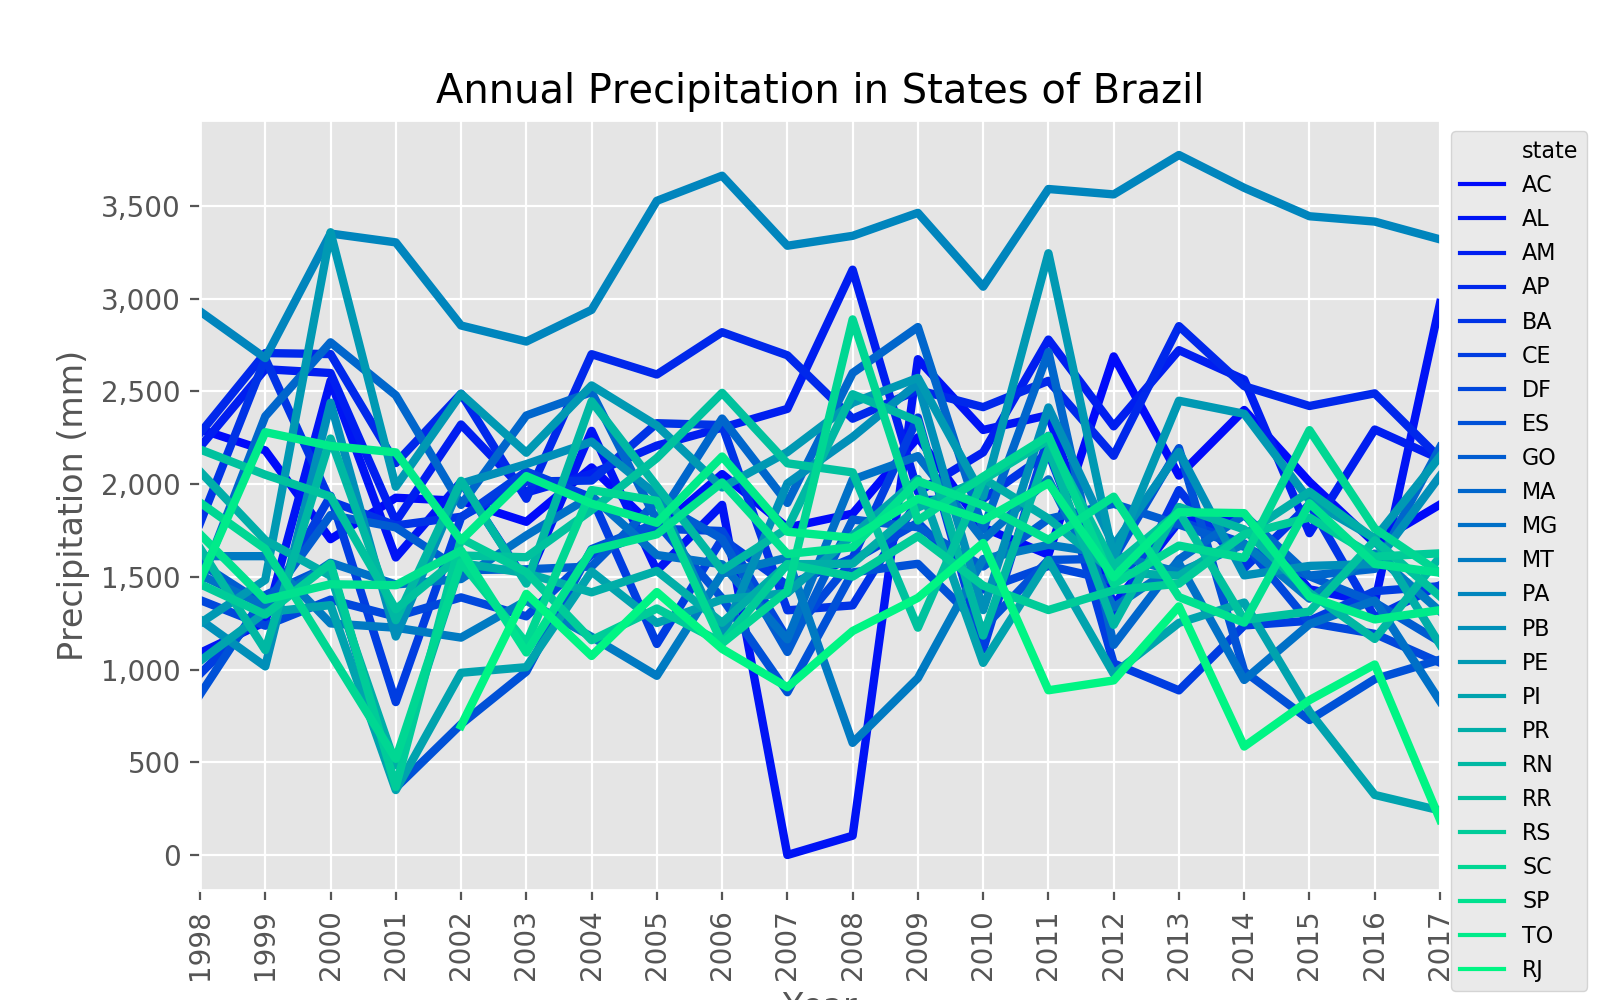

In [12]:
#create line graph for states and yearly precipitation
analysis = state_response[state_response['state'].isin(["AC", "AL", "AM", "AP", "BA", "CE", "DF", "ES", "GO", "MA", "MG", "MT", "PA", "PB", "PE", "PI","PR", "RJ", "RN", "RR", "RS", "SC", "SP", "TO"])].groupby(by = ['year','state', 'precipitation']).sum().reset_index()

plt.figure(figsize=(8,5))

ax = sns.lineplot(x = 'year', y = 'precipitation', data = analysis, hue = 'state', estimator = 'sum', color = 'orange', lw = 3, 
                  err_style = None, palette = 'winter')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'], rotation=90)

plt.title('Annual Precipitation in States of Brazil')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')

ax.xaxis.set_major_locator(plt.MaxNLocator(19))
ax.set_xlim(1998, 2017)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.legend(loc='best', bbox_to_anchor=(1, 1), fontsize=8)

plt.savefig("Annual Precipitation in States Brazil.png")

In [10]:
#find averages of each state
state_df = state_response.groupby(["state"])
state_average = state_df.mean()["precipitation"]
state_average_df = pd.DataFrame(state_average)

state_average_analysis = state_average_df.reset_index()
state_average_df

,precipitation
state,
AC,1983.965000
AL,1695.150000
AM,2315.250000
AP,2471.790000
BA,1836.790000
CE,1490.330000
DF,1453.055000
ES,1250.695000
GO,1608.100000


<IPython.core.display.Javascript object>


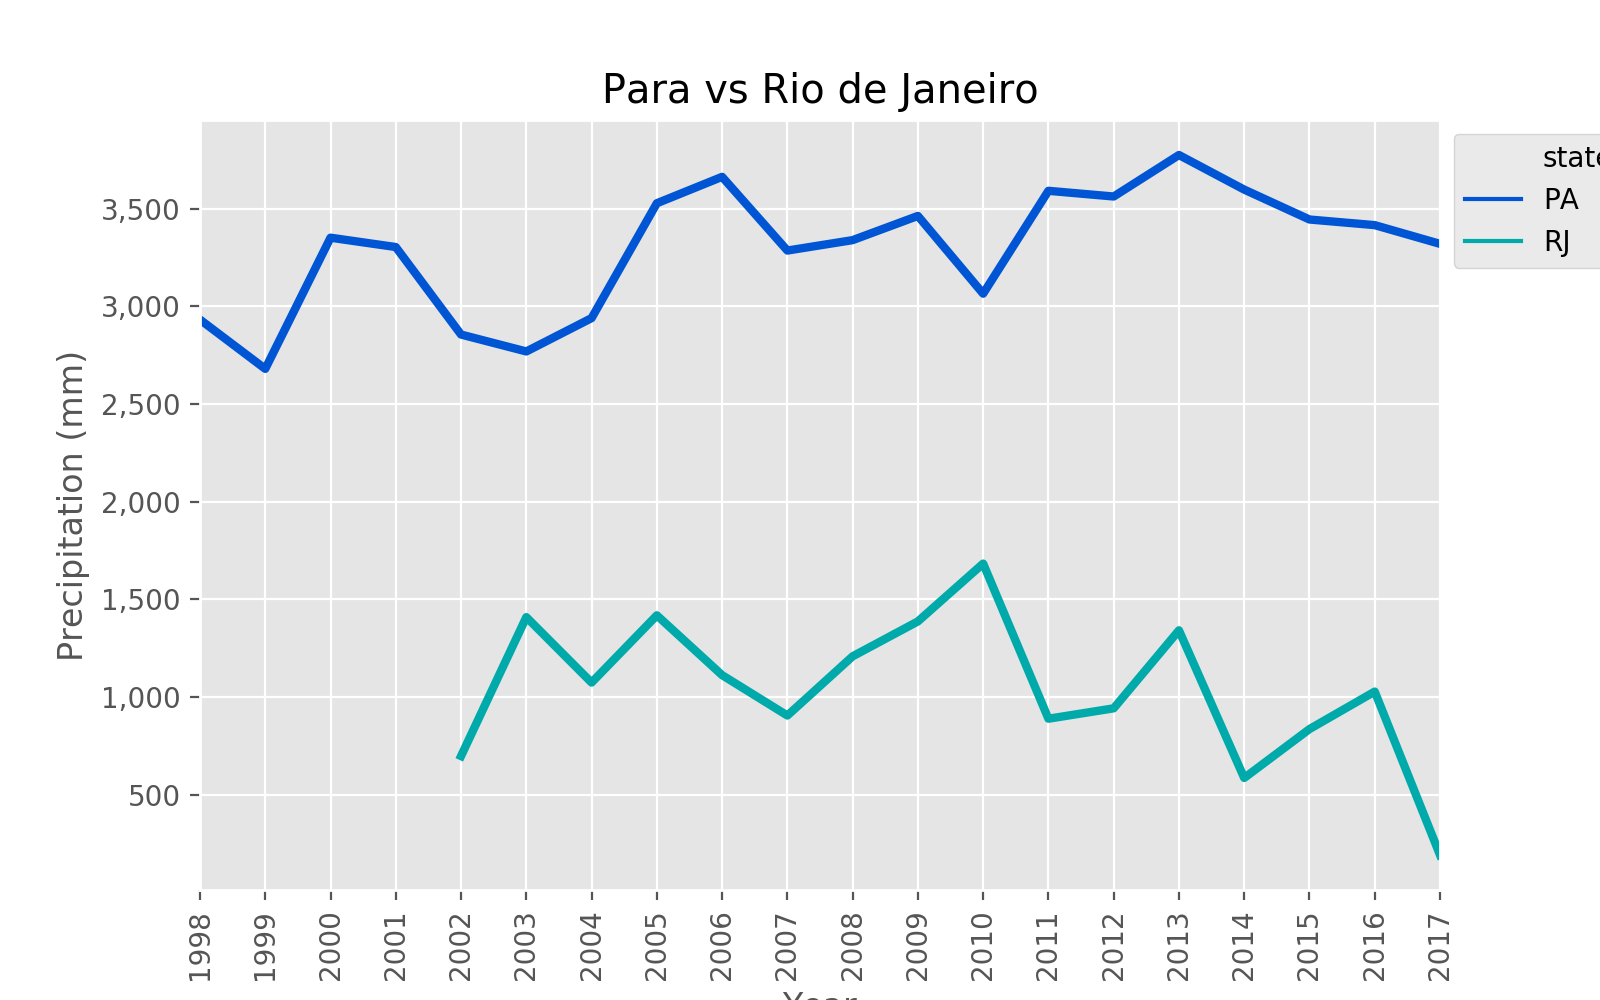

In [11]:
#create line graph for highest average and lowest average 
analysis = state_response[state_response['state'].isin(["RJ", "PA"])].groupby(by = ['year','state', 'precipitation']).sum().reset_index()

plt.figure(figsize=(8,5))

ax = sns.lineplot(x = 'year', y = 'precipitation', data = analysis, hue = 'state', estimator = 'sum', color = 'orange', lw = 3, 
                  err_style = None, palette = 'winter')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'], rotation=90)

plt.title('Para vs Rio de Janeiro')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')

ax.xaxis.set_major_locator(plt.MaxNLocator(19))
ax.set_xlim(1998, 2017)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.legend(loc='best', bbox_to_anchor=(1, 1))

plt.savefig("Para vs Rio de Janeiro.png")